In [1]:
import prob_dist as pd
import resfuncRead as rfr


ptres = rfr.getRFunc('data/jardin_ptres.txt')

qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

fp = rfr.makeRFunc(ptres[1]['sqrt'])

fq = rfr.makeRFunc(qres[1]['lin'],True)

sigp = lambda x: fp(x) #convert from eV

sigq = lambda x: fq(x) #convert from eV

f = pd.YEr_v2_2D(sigp,sigq,4,(3.3/1000),1)


print(f(0.25,10,10))


g = pd.YErSpec_v2_2D(f)

print(g(0.06,10))


7.027725202858449
1.697270611638863e-09


In [2]:
#make a yield function
import numpy as np

y10 = lambda x: g(x,10)
y10v = np.vectorize(y10)

x = np.arange(0,0.6,0.01)
y = y10v(x)

In [3]:
#test out the plotting 
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

0.24216979974979333


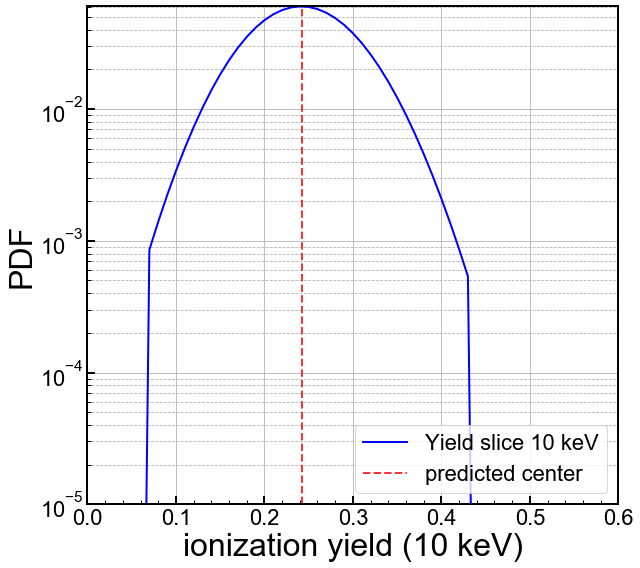

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

Ertest = 10
ynr = lambda x: 0.16*x**0.18
ymax = np.max(y)

#plot quick
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.plot(x, Y_Er_v(x,Ertest),label='E$_r$ function')
ax1.plot(x, y,color='b',lw=2, label='Yield slice 10 keV')
#ax1.contour(X, Y, Z, colors='black',label='E$_r$/N')
#ax1.contour(Xnr, Ynr, Znr, 50,cmap='RdGy');
#plt.contourf(Xnr, Ynr, Znr, 50,cmap='RdGy');

print(ynr(Ertest))
ax1.axvline(ynr(Ertest), color='r', linestyle='--', lw=2, alpha=0.8,label='predicted center')

ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0, 0.6) 
ax1.set_ylim(1e-5,ymax)
ax1.set_xlabel('ionization yield (10 keV)',**axis_font)
ax1.set_ylabel('PDF',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
#plt.colorbar()
plt.show()

In [5]:
import time

start = time.time()
f(0.25,40,40)
end = time.time()
print(end - start)

start = time.time()
g(0.07,10)
end = time.time()
print(end - start)

0.017988204956054688
4.8964293003082275
